#### Question3:

in this question we have to decide if a micro is accepted or rejected based on two test results.
we consider thos two test results as two features, I opend the file and read the results of test and saved them as two features in lists f1 and f2, I also have a list group that saves each micro wasaccepted or rejected. I will use them to run my algorithm later.
I also have two set of lisits x0 , y0 and x1 , y1. they store the results of test in seperate lists, if the micro was accepted its features will be saved in x1,y1 and if rejected its fetures will be saved in x0,y0. I use these lisits to draw diagram of data of each group in diffrent colors.
I have set a learing rate alpha to 0.05
m is the count of the training data.
after drawing the diagram I'll explain why I used 5 tetas for my model.but now I'll just say that I initialized them randomly.

In [2]:
import random
x0=[]
y0=[]
x1=[]
y1=[]
f1=[]
f2=[]
alpha=0.05
teta0=random.random()
teta1=random.random()
teta2=random.random()
teta3=random.random()
teta4=random.random()


temp0=temp1=temp2=temp3=temp4=0

group=[]
m=0

with open('micro_test_data.txt') as file:
    for line in file:
        data=line.split(',')
        
        f1.append(float(data[0]))
        f2.append(float(data[1]))
        group.append(int(data[2]))
        m+=1
        
        if(int(data[2])==1):
            x1.append(float(data[0]))
            y1.append(float(data[1]))

        else:
            x0.append(float(data[0]))
            y0.append(float(data[1]))
            
print(alpha)


0.05


the below function is written to reset the values. it will be used in next parts. 

In [3]:
def reset_data():
    alpha=0.05
    teta0=random.random()
    teta1=random.random()
    teta2=random.random()
    teta3=random.random()
    teta4=random.random()

    temp0=temp1=temp2=temp3=temp4=0

    del output[:]

in this part I drew the diagram of data based on two features, the pink data are those wich are accepted by tests and the yellow ones are rejected micros.
we can see that it's impossible to seperate them with just a line so we have to use feature mapping, as we can see the border to seperate data is almost like an oval so the feature mapping that I'll use will be the model bellow:
f1-->feature1
f2-->feture2
model : teta0+(teta1*f1)+(teta2*f2)+(teta3*f1*f1)+(teta4*f2*f2)
you see that we created two other features f1*f1 and f2*f2
what we are going to do is to set teta valuse so that the model can seperate the micros in two accepted and rejected groups as best at it can.

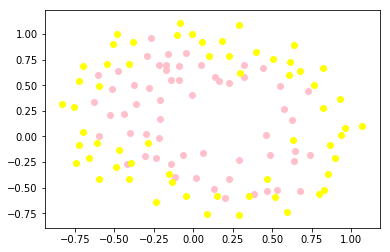

In [5]:
import matplotlib.pyplot as plt
import numpy as np  
plt.scatter(x1,y1,color='pink')
plt.scatter(x0,y0,color='yellow')

plt.show()

this is implementation of sigmoid function wich we are going to use as our activation function

In [6]:
import math
def sigmoid(a):
    return 1/(1+math.exp(-a))

this is the z function that we are going to use in our h function

In [7]:
def z(i):
    return teta0+(teta1*f1[i])+(teta2*f2[i])+(teta3*(f1[i]*f1[i]))+(teta4*(f2[i]*f2[i]))

this is h function that calculates the probability of belonging of a micro to a group for each training data.
h = sigmoid(z)

In [8]:
def h(i):
    return sigmoid(z(i))

this is our update function it calculates the derivation of each teta based on our error function wich is Cross Enthropy. it also uses a landa parameter as regularization coeffitient, later, we will use diffrent values for this in next parts to see the effect on the output.

In [9]:
def update(number,lnada):
    if(number==0):
        sigma=0
        for i in range(m):
            sigma+=h(i)-group[i]
        return sigma
    
    elif(number==1):
        sigma=0
        for i in range(m):
            sigma+=(h(i)-group[i])*f1[i]
        return sigma+(landa*teta1)
    
    elif(number==2):
        sigma=0
        for i in range(m):
            sigma+=(h(i)-group[i])*f2[i]
        return sigma+(landa*teta2)
    
    elif(number==3):
        sigma=0
        for i in range(m):
            sigma+=(h(i)-group[i])*f1[i]*f1[i]
        return sigma+(landa*teta3)
    
    elif(number==4):
        sigma=0
        for i in range(m):
            sigma+=(h(i)-group[i])*f2[i]*f2[i]
        return sigma+(landa*teta4)





    

the code bellow, performs GD it updates teta for 5000 iteratons.
it means that it calls update function and update teta valaues until an accaptable convergence so that our  model can decide wich micro should be accepted or rejected as best as it can.
in our first try we set landa to 0, it means we wont have regularization.

In [10]:
landa=0
for i in range(5000):
    sigma=update(0,landa)
    temp0=teta0-alpha*((1.0/float(m))*sigma)
    sigma=update(1,landa)
    temp1=teta1-alpha*((1.0/float(m))*sigma)
    sigma=update(2,landa)
    temp2=teta2-alpha*((1.0/float(m))*sigma)
    sigma=update(3,landa)
    temp3=teta3-alpha*((1.0/float(m))*sigma)
    sigma=update(4,landa)
    temp4=teta4-alpha*((1.0/float(m))*sigma)

    teta0=temp0
    teta1=temp1
    teta2=temp2
    teta3=temp3
    teta4=temp4
    
print(teta0)
print(teta1)
print(teta2)
print(teta3)
print(teta4)

2.14529038619
0.644505098774
1.2008531523
-4.8969465552
-4.23692199356


we see that our algorithm calculates the tata values. now based on our model we go trough our data and see if our model can seperate the micros from each other. fo this means based on our model and teta values calculated we seperate data like this :
h(i)>0.5 --> accaptable
h(i)<0.5 --> reject
I save my model decision in two set of lists :x_temp0,y_temp0 and x_temp1,y_temp1 to draw them later

In [11]:
output=[]
for i in range(m):
    if (h(i)>0.5):
        output.append(1)
    else:
        output.append(0)

x_tmp0=[]
x_tmp1=[]
y_tmp0=[]
y_tmp1=[]
        
for i in range(m):
    if(output[i]==1):
        x_tmp1.append(f1[i])
        y_tmp1.append(f2[i])
    else:
        x_tmp0.append(f1[i])
        y_tmp0.append(f2[i])

finally! we draw our model desicion for seperating the micros.
this one is without regularization. we can see that the model could seperate them almost perfectly (compare the diagram of results to the diagram of reall data)

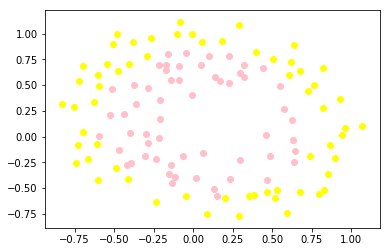

In [12]:
import matplotlib.pyplot as plt
import numpy as np  
plt.scatter(x_tmp1,y_tmp1,color='pink')
plt.scatter(x_tmp0,y_tmp0,color='yellow')

plt.show()

now, it's time to test regularization! we reset our past calculations and we set the landa(regularizarion parameter) to a larger value and reperform the GD algorithm.
it will try to decrease the model complexity and the teta values get closer to 0.

In [16]:
reset_data()
landa=10
for i in range(5000):
    sigma=update(0,landa)
    temp0=teta0-alpha*((1.0/float(m))*sigma)
    sigma=update(1,landa)
    temp1=teta1-alpha*((1.0/float(m))*sigma)
    sigma=update(2,landa)
    temp2=teta2-alpha*((1.0/float(m))*sigma)
    sigma=update(3,landa)
    temp3=teta3-alpha*((1.0/float(m))*sigma)
    sigma=update(4,landa)
    temp4=teta4-alpha*((1.0/float(m))*sigma)

    teta0=temp0
    teta1=temp1
    teta2=temp2
    teta3=temp3
    teta4=temp4
    
print(teta0)
print(teta1)
print(teta2)
print(teta3)
print(teta4)

0.196646538653
-0.0847968956532
0.0464729383131
-0.493719040923
-0.37334063425


again, based on our model we go trough our data and see if our model can seperate the micros from each other. fo this means based on our model and teta values calculated we seperate data like this :
h(i)>0.5 --> accaptable
h(i)<0.5 --> reject
I save my model decision in two set of lists :x_temp0,y_temp0 and x_temp1,y_temp1 to draw them later.
this time we used regulariaztion with a large landa parameter.

In [17]:
del output[:]
for i in range(m):
    if (h(i)>0.5):
        output.append(1)
    else:
        output.append(0)

x_tmp0=[]
x_tmp1=[]
y_tmp0=[]
y_tmp1=[]
        
for i in range(m):
    if(output[i]==1):
        x_tmp1.append(f1[i])
        y_tmp1.append(f2[i])
    else:
        x_tmp0.append(f1[i])
        y_tmp0.append(f2[i])

now we draw the results!
we can see with regularization the complexity of model will decrease and teta values get closer to 0.
it is obvious that the accuracy of our model is lower with regularization. we explain the conclution in next parts.

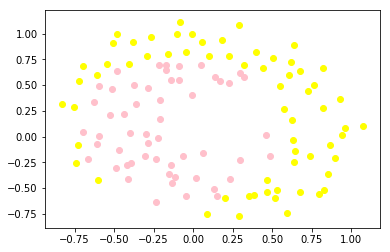

In [18]:
import matplotlib.pyplot as plt
import numpy as np  
plt.scatter(x_tmp1,y_tmp1,color='pink')
plt.scatter(x_tmp0,y_tmp0,color='yellow')

plt.show()

CONCLUSION :
if we use a complex model that can seperate our test data perfectly, everythin seems good, but we have a problem! our model can be overfitted, it means that for we added so much complexiy to model to cover special cases in our train data that the model might not perform so good with test data. with regularization we try to decrease the complexity of our model with removing unneeded features.

in the other hand, if we set a very high regularization parameter, the comlexity of model will decrease too much, it means that out model will ignor many of its features and it causes bad performance, not only in test data but also in train data, in this case we say our model is underfit.

so we should try to find a proper regularization parameter for our problems so we can have a just right model, it means not underfitted or overfitted.